### Research Progress Meeting 2020-04-16

<img src="https://pubs.usgs.gov/of/2003/ofr03-193/cd_files/USGS_Storms/photos/USGS_78.jpg" width=70%/>

Source: https://www.houstonchronicle.com/news/houston-texas/houston/article/Houston-no-stranger-to-chemical-plant-fires-13697557.php#photo-17090239. A video of the fire can be seen at https://abc13.com/river-fire-flood-san-jacinto-on/1563118/.

### Purpose

* Looking at the incidents
* Takeaways on changes made after incidents/learning
* Takeaways on impacts

## Setup

In [1]:
library(oildata)
library(tidyverse)
library(gridExtra)
library(glue)

packageVersion("oildata")

── Attaching packages ─────────────── tidyverse 1.3.0 ──

✓ ggplot2 3.3.0     ✓ purrr   0.3.3
✓ tibble  3.0.0     ✓ dplyr   0.8.5
✓ tidyr   1.0.2     ✓ stringr 1.4.0
✓ readr   1.3.1     ✓ forcats 0.5.0

── Conflicts ────────────────── tidyverse_conflicts() ──
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




[1] ‘1.1.8’

In [2]:
incidents <- subset(incidents, commodity %in% c("hvl", "rpp", "crude"))

glimpse(incidents)

Rows: 9,649
Columns: 29
$ DATAFILE_AS_OF      <dttm> 2020-03-31 04:52:07, 2020-03-31 04:52:07, 2020-0…
$ significant         <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ serious             <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ incident_ID         <dbl> 19860003, 19860027, 19860028, 19860029, 19860030,…
$ ID                  <dbl> 22907, 12628, 12628, 18273, 18273, 18718, 15490, …
$ name                <chr> "Wyco Pipe Line", "Mobil Pipeline", "Mobil Pipeli…
$ state               <chr> "CO", "TX", "TX", "TX", "TX", "NJ", "TX", "KS", "…
$ on_offshore         <chr> "onshore", "onshore", "onshore", "onshore", "onsh…
$ installation_year   <dbl> 1966, 1963, 1926, 1939, 1955, 1956, 1930, 1958, 1…
$ CAUSE               <chr> "OUTSIDE FORCE DAMAGE", "CORROSION", "OUTSIDE FOR…
$ cause               <chr> "excavation damage", "corrosion", "excavation dam…
$ MAP_SUBCAUSE        <chr> "THIRD PARTY EXCAVATION DAMAGE", "INTERNAL", "THI…
$ fatalities          <dbl> 

In [3]:
print_inc <- function(inc) {
    info <- glue("
General information

Company name:  {inc$name}
Commodity:     {inc$commodity}
Date:          {inc$date}
Lat/Long:      {inc$long}/{inc$lat}
State:         {inc$state}


Outcomes

Spill volume:    {inc$volume}
Recovered:       {inc$recovered}
Net loss:        {inc$net_loss}
Cost (USD 1984): {sprintf('%d', inc$cost)}
Injuries:        {inc$injuries}
Fatalities:      {inc$fatalities}


Causes

Cause (self_selected):     {inc$CAUSE}
Cause (coded by PHMSA):    {inc$cause}
Subcause (coded by PHMSA): {inc$MAP_SUBCAUSE}


Other impact
Water contamination:    {inc$water_contamination}
Did a fire occur?       {ifelse(inc$fire, 'Yes', 'No')}
Did an explosion occur? {ifelse(inc$explosion, 'Yes', 'No')}
")
    print(info)
} 

## Incidents - metrics

In [4]:
top_volume <- incidents %>%
    top_n(10, volume) %>%
    arrange(desc(volume)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name, "-", year)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-1000, rep(1000, 9))) +
        scale_x_continuous(breaks = 1:10) +
        labs(x = NULL, y = "Volume spilled (in barrels)")

options(repr.plot.width=8, repr.plot.height=6)

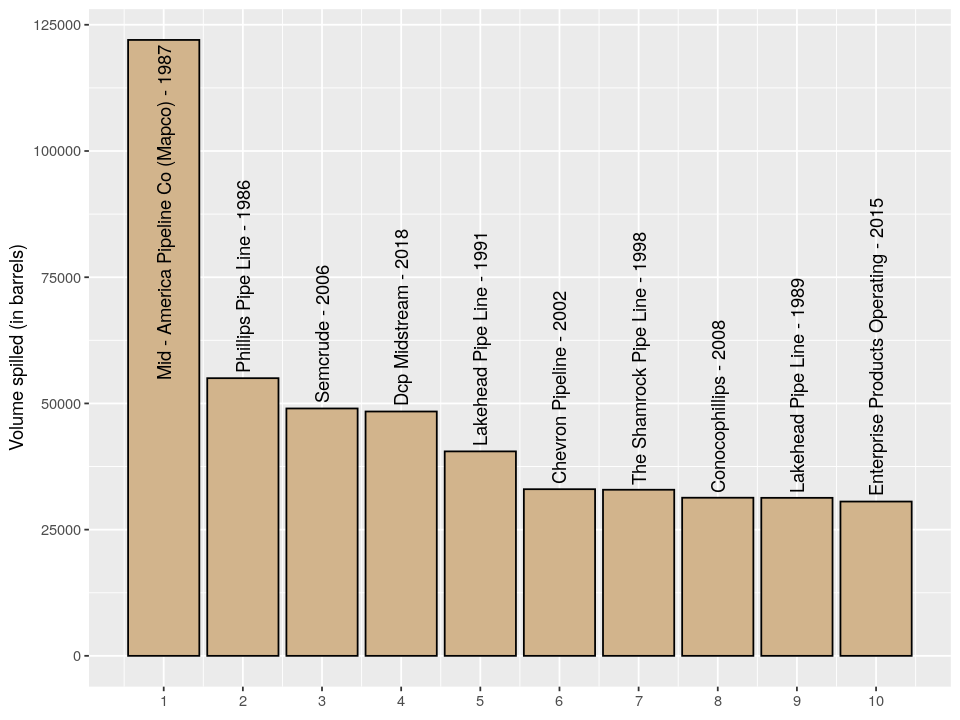

In [5]:
top_volume

In [6]:
incidents$name_short <- substr(incidents$name, 1, 15)
incidents$year_short <- substr(incidents$year, 3, 4)

top_net_loss <- incidents %>%
    top_n(10, net_loss) %>%
    arrange(desc(net_loss)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, net_loss)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste0(name_short, " '", year_short)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-1000, rep(1000, 9))) +
        labs(x = NULL, y = "Net loss (in barrels)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_cost <- incidents %>%
    top_n(10, cost_1984) %>%
    arrange(desc(cost_1984)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, cost_1984)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, " '", year_short)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-10000000, rep(10000000, 9))) +
        labs(x = NULL, y = "Cost (in 1984 USD)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_injuries <- incidents %>%
    top_n(10, injuries) %>%
    arrange(desc(injuries)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, injuries)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, "'", year_short)), angle = 90, 
                  hjust = c(1, 1, rep(0, 8)), nudge_y = c(-0.05, -0.05, rep(0.05, 8))) +
        labs(x = NULL, y = "Number of injuries") +
        scale_y_log10() +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_fatalities <- incidents %>%
    top_n(10, fatalities) %>%
    arrange(desc(fatalities)) %>%
    mutate(n = 1:n()) %>%
    top_n(10, n) %>%
    ggplot(aes(n, fatalities)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, "'", year_short)), angle = 90, 
                  hjust = c(1), nudge_y = c(-0.05)) +
        labs(x = NULL, y = "Number of fatalities") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_grid <- arrangeGrob(top_net_loss, top_cost, top_injuries, top_fatalities, ncol=2)

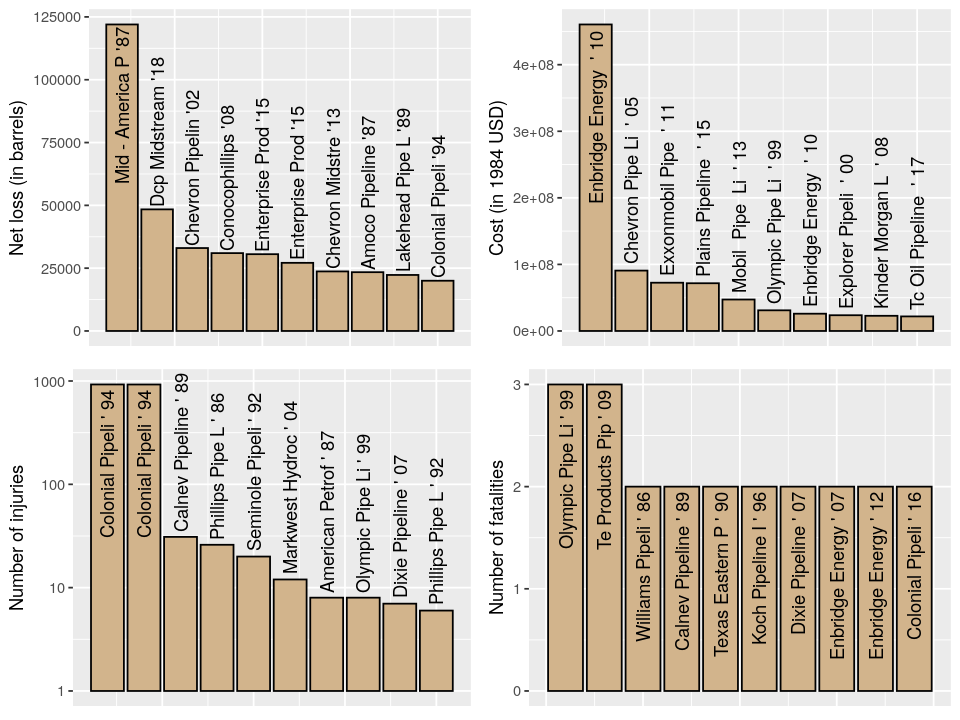

In [7]:
grid::grid.draw(top_grid)

### Incident profiles

In [8]:
incidents$name_short <- substr(incidents$name, 1, 23)
incidents$year_short <- substr(incidents$year, 3, 4)

top_10 <- top_n(incidents, 3, volume) %>%
    bind_rows(top_n(incidents, 3, net_loss)) %>%
    bind_rows(top_n(incidents, 3, cost)) %>%
    bind_rows(top_n(incidents, 3, injuries)) %>%
    bind_rows(top_n(incidents, 3, fatalities)) %>%
    unique()

top_10$log_injuries <- log(top_10$injuries + 1)
top_10$log_cost <- log(top_10$cost + 1)

top_10$nickname <- paste0(top_10$name_short, " '", top_10$year_short)
top_10$nickname <- ifelse(duplicated(top_10$nickname), paste0(top_10$nickname, "b"), top_10$nickname)

relevant_cols <- quos(c(nickname, incident_ID, volume, net_loss, log_cost, log_injuries, fatalities))

top_10_scaled <- top_10 %>%
    select(!!! relevant_cols) %>%
    mutate_at(vars(volume, net_loss, log_cost, log_injuries, fatalities), scales::rescale)
head(top_10_scaled)

nickname,incident_ID,volume,net_loss,log_cost,log_injuries,fatalities
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Phillips Pipe Line '86,19860159,0.4508197,NA,0.6385723,0.482415,0
Mid - America Pipeline '87,19870101,1.0000000,1.0000000000,0.0000000,0.000000,0
Semcrude '06,20060071,0.4016393,0.0008196721,0.6553268,0.000000,0
Chevron Pipeline '02,20020383,0.2705738,0.2705737705,0.6442606,0.000000,0
Dcp Midstream '18,20180382,0.3967213,0.3967213115,0.8047288,0.160805,0
Chevron Pipe Line Compa '05,20050287,0.1935574,0.0000000000,0.9161347,0.000000,0


In [9]:
incident_profiles <- top_10_scaled %>%
    pivot_longer(-c(nickname, incident_ID)) %>%
    ggplot(aes(x = name, y = value)) +
        geom_col() +
        facet_wrap(~ nickname) +
        coord_flip() + 
        labs(y = NULL, x = NULL)

# incident_profiles_1 <- top_10_scaled %>%
#     slice(1:round(n()/2)) %>%
#     pivot_longer(-nickname) %>%
#     ggplot(aes(x = name, y = value)) +
#         geom_col() +
#         facet_wrap(~ nickname) +
#         coord_flip()

# incident_profiles_2 <- top_10_scaled %>%
#     slice((round(n()/2) + 1): n()) %>%
#     pivot_longer(-nickname) %>%
#     ggplot(aes(x = name, y = value)) +
#         geom_col() +
#         facet_wrap(~ nickname) +
#         coord_flip()

Warning message:
“Removed 3 rows containing missing values (position_stack).”


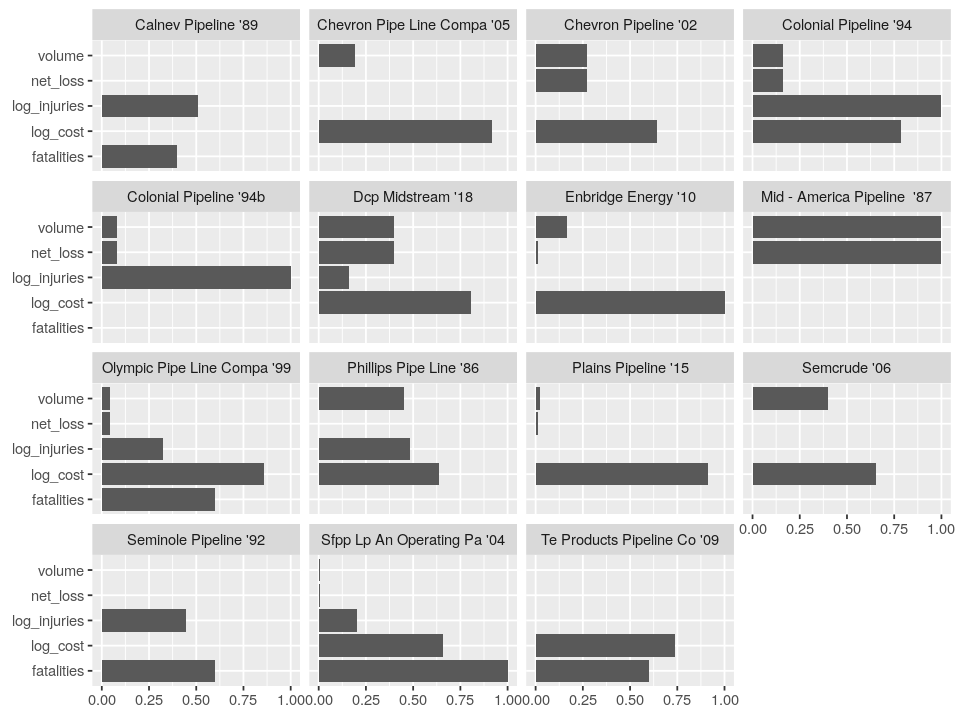

In [10]:
incident_profiles

## San Bernadino train disaster '89 - gas explosion

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Duffy_St._train_disaster_San_Bernardino_California_May_12_1989.jpg" width=80%/>

The pipeline exploded 13 days after the train derailment. Damage to the pipeline had possibly resulted from the cleanup work.

In [11]:
inc <- subset(incidents, incident_ID == 19890074)
print_inc(inc)

General information

Company name:  Calnev Pipeline
Commodity:     rpp
Date:          1989-05-24
Lat/Long:      NA/NA
State:         CA


Outcomes

Spill volume:    0
Recovered:       0
Net loss:        0
Cost (USD 1984): 0
Injuries:        31
Fatalities:      2


Causes

Cause (self_selected):     OUTSIDE FORCE DAMAGE
Cause (coded by PHMSA):    excavation damage
Subcause (coded by PHMSA): THIRD PARTY EXCAVATION DAMAGE


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? No


In [12]:
inc$narrative

[1] "A southern pacific rairoad train derailed on may 12, 1989 at the site of thesubsequent pipeline rupture.  The pipeline was shut down during the clean-upoperations.  Clean-up was monitored by pipeline personnel and the pipeline excavated and inspected at several locations.  The line was restarted on may 16.  On may 25, 1989, during stable pipeline operations, the pipeline rupturedspilling gasoline and causing a fire."

### Incident description - San Bernadino train disaster

This pipeline spill is related to the San Bernadino train disaster. The train derailment immediately caused four deaths. According to the incident report by the National Transportation Safety Board, the pipeline ruptured 13 days after the incident. When it did, a fountain of gasoline shot out of the pipeline, and this fountain engulfed in flames. This fountain reportedly stood 10 feet higher than the rooftops of the village. The surrounding houses were doused in gasoline and burned down, two residents were burned alive.

Also of notice:

* The reported metrics, which report that despite the two deaths, no oil was spilled and no damage cause, are obviously not correct.
* The incident report also touches on the cause of the pipeline incident.
    * Was the pipeline damaged even before the disaster? It was most likely damaged after the disaster during the clean up.
    * The person on duty attempted to start a pump multiple times within three minutes before he was informed of the fire by a San Bernadino official.
    * Was the pipeline improperly reopened? It was inspected after the disaster.
    * The cost of the rupture is reported as \\$453,433 for the damage to the houses, \\$300,000 for the loss of gasoline, \\$500,000 for repairing the pipelin, and \\$1,060,000 for environmental cleanup (p. 39).
    
---

Source: National Transportation Safety Board report (http://www.pipelinesafetytrust.com/docs/ntsb_doc26.pdf)

### Seminole '92

![Seminole explosion aftermath](https://bloximages.chicago2.vip.townnews.com/theeagle.com/content/tncms/assets/v3/editorial/e/cc/eccb11ba-019b-11e2-a931-0019bb2963f4/50588327704e9.image.jpg?resize=600%2C385)

Aftermath of the pipeline explosion.

Source: https://www.theeagle.com/townnews/commerce/salt-dome-explosion-20-years-later/article_cab6128c-019b-11e2-8e7e-0019bb2963f4.html

In [13]:
inc <- subset(incidents, incident_ID == 19920109)
print_inc(inc)

General information

Company name:  Seminole Pipeline
Commodity:     hvl
Date:          1992-04-06
Lat/Long:      NA/NA
State:         TX


Outcomes

Spill volume:    0
Recovered:       0
Net loss:        0
Cost (USD 1984): 0
Injuries:        20
Fatalities:      3


Causes

Cause (self_selected):     OTHER
Cause (coded by PHMSA):    all other causes
Subcause (coded by PHMSA): MISCELLANEOUS


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? Yes


In [14]:
inc$narrative

[1] "((Death and injury information based upon media reports)).  An explosion andfire occurred in the area around seminole pipeline company's brenham station.  This incident is currently under investigation by the national transportation safety board to determine the cause."

### Incident description - Seminole '92

Source: https://www.nytimes.com./1992/04/08/us/gas-explosion-tears-through-texas-pastures.html

* "Several homes were left in shambles one to two miles from the explosion and rolling pasture was charred."
* "[F]our or five homes were destroyed", meaning that the cost was almost certainly not zero.
* There were also at least 17 animals such as cows and donkeys.
* Some residents were warned a few minutes ahead of time, when the company detected the leak.

Source: https://www.theeagle.com/townnews/commerce/salt-dome-explosion-20-years-later/article_cab6128c-019b-11e2-8e7e-0019bb2963f4.html

* The residents were not aware that there was a gas storage facility (a salt dome) in their community.
* The worker on duty relied on the safety equipment.
* The safety equipment was faulty, and the cavern overfilled.
* "[G]overnment indifference was part of the problem. It took five years, but finally the U.S. Department of Transportation Pipeline and Hazardous Materials Safety Administration issued an advisory to operators of gas and hazardous liquid underground storage facilities: Henceforth, they were were required to create design guidelines and operation guidelines for salt domes, efforts that long ago should have been made mandatory."

---
* I sense a theme of (older? pre-2002?) incident reports being incomplete.

## Hurricane Rosa '94 (19940236 & 19940237)

<img src="https://pubs.usgs.gov/of/2003/ofr03-193/cd_files/USGS_Storms/photos/USGS_78.jpg" width=70%/>

Source: https://www.houstonchronicle.com/news/houston-texas/houston/article/Houston-no-stranger-to-chemical-plant-fires-13697557.php#photo-17090239. A video of the fire can be seen at https://abc13.com/river-fire-flood-san-jacinto-on/1563118/.

<img src="https://s.hdnux.com/photos/01/01/14/32/17090239/3/940x0.jpg" width=45%/>

Source: https://www.houstonchronicle.com/news/houston-texas/houston/article/Houston-no-stranger-to-chemical-plant-fires-13697557.php#photo-17090239.

In [15]:
inc <- subset(incidents, incident_ID == 19940236)
print_inc(inc)

General information

Company name:  Colonial Pipeline
Commodity:     rpp
Date:          1994-10-19
Lat/Long:      NA/NA
State:         TX


Outcomes

Spill volume:    20000
Recovered:       0
Net loss:        20000
Cost (USD 1984): 10000000
Injuries:        925
Fatalities:      0


Causes

Cause (self_selected):     OUTSIDE FORCE DAMAGE
Cause (coded by PHMSA):    natural force damage
Subcause (coded by PHMSA): HEAVY RAINS/FLOODS


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? No


In [16]:
inc$narrative

[1] "On thursday, october 20, 1994, a pressure drop and significant rate increaseon line 01, were noted at houston station by the local station operator and by the line controller in atlanta,ga at approximately 0831 cdt. The line was immediately shut down and company personnel began searching for a possible leak. Personnel were also dispatched to close block valves between houston station and shiloh station. At 0937 cdt gasoline was found in a new channel created by flood waters of the san jacinto river, approximately 12.5 miles downstream of houston station. The pipeline was severed near the west bank of the new channel. Shortly after the discovery of the location of the leak, the gasoline fumes ignited near the river road area of channelview, tx. Telephonic notice was made to the nrc at 0924 cdt on 10/20/1994, report no. 266190. It is estimated that 20,000 barrels of gasoline escaped from the severed pipeline, all of which was consumed by the fire or lost to evaporation. While at the present time the estimated total property damages are undetermined,the combined costs for the line 01, line 02 and the texaco crude oil line breaks are expected to exceed $10,000,000. This incident is under investigation by the ntsb. The number of person (1851) injuried is a combined total with line 02 break and texaco crude oil line see report #940237 for line 2 information."

### Incident description - Hurricane Rosa '94

* The high number stems from the fact that smoke filled a residential area.
* After the incident, Colonial Pipeline crossed the river with a new pipeline, that was burried 30 feet below the river bed. Reports do not indicate that pipelines in other places were replaced.

### the Pipeline Special Investigation Report

* 547 people received "mostly minor" (p. V) burn and inhalation injuries.
* Takeaways: "need for effective operational monitoring of pipelines and for the use of remote- or automatic-operated valves" (p. 1).
* The Colinial Pipeline spill occured hours after a competitor's pipeline had already ruptured.
* "After the first [!] explosion, fire and smoke rose about 300–400 feet into the air."
* Most of the oil was burned off in-situe, hence the burn and inhalation injuries.
* Engaging in discussion of semantics (p. 33).
* The burning of the commodity was found to be a wrong decision "because three different products [...] would be involved." (p. 44). On the other hand "[i]n hindsight, the in-situ burn was likely the most effective remedy measure that could have been undertaken" (p.44).
* Recommending action to industry associations, not lawmakers.

Sidenote:

* No major pipeline damage was reported after Hurricane Harvey in 2017.

See also: https://www.nytimes.com./1994/10/21/us/flooding-sets-off-blast-of-major-fuel-pipeline.html

## Olympic Pipe Line '99

![Olympic Pipe Line fire](https://www.bellinghamherald.com/latest-news/ju0o3y/picture21815628/alternates/LANDSCAPE_1140/Pipeline_smoke.source.prod_affiliate.39.jpg)

In [17]:
inc <- subset(incidents, incident_ID == 19990107)
print_inc(inc)

General information

Company name:  Olympic Pipe Line Company
Commodity:     rpp
Date:          1999-06-09
Lat/Long:      NA/NA
State:         WA


Outcomes

Spill volume:    5475
Recovered:       234
Net loss:        5241
Cost (USD 1984): 45000000
Injuries:        8
Fatalities:      3


Causes

Cause (self_selected):     OTHER
Cause (coded by PHMSA):    all other causes
Subcause (coded by PHMSA): MISCELLANEOUS


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? No


In [18]:
inc$narrative

[1] "Mainline 16\" pipline rupture.  Cause is being investigated by the ntsb and dot office of pipeline safety.  Initial examination of the pipe revealed a 28\" longintudinal spill and gouges and dents adjacent to the rupture area.  Details to be provided following the ntsb investigation.  Supplemental info:  mainline 16\" pipeline ruptured.  Initial examination of the failed pipe revealed at 28\" longitudinal split with gouges and dents adjacent to the rupture area.  The impact of this damage on the pipes failure, as well as all other potential causes including the functioning of surge relief equipment, is under current investigation by the ntsb and the dot office of pipeline safety."

### Incident Report - Olympic Pipe Line '99

https://www.kiro7.com/news/north-sound-news/on-this-day-olympic-pipeline-explosion-in-bellingham-kills-three-in-1999/766933436/

* The death toll would have been much higher if it was not for the fact that two of the dead unknowingly set off fireworks near the spill.

#### Natural Resources & Environment article

* "[The resulting judgement] was the first time the federal government had asserted a violation of the [Pipeline Safety Act] in a judicial action, let alone a criminal action" (p. 33). Implying that pipeline spills usually do not lead to trials (under this act?).
* The ensuing legal battle threatened to bankrupt Olympic Pipe Line, causing a judge to impose a more lenient fine that the company could actually afford to pay.
* Multiple (I believe 3?) employees of two companies (Olympic Pipe Line and a "co-operator") went to jail.

#### Pipeline Accident Report

* Surprising, how small and fragile a pipeline looks.
* The pipeline was damaged when water pipe was installed above it. The operator was found to have violated its supervisory duties.
* The pipeline section was tested with a smart pig before the incident. However, employees decided to disregard the findings which indicated that there might be damages - because the smart pig has had false positives before. 
* A nearby valve was also faulty.
* The SCADA system had crashed and the personnel on duty was very eager to restart the pipeline.
* Relatively thin on safety recommendations after the incident.

<img src="../resources/olympic_recommendations.png" width=60%/>

Source: Pipeline Accident Report p.73